<a href="https://colab.research.google.com/github/Lakshyadeepyadav/1stproject/blob/main/Copy_of_Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido

In [45]:
import pandas as pd

In [46]:
from google.colab import files
files.upload()

{}

In [47]:
data=pd.read_csv("Titanic-Dataset (1).csv")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.shape

(891, 12)

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [52]:
data["Age"]=data["Age"].fillna(data["Age"].mode()[0])

In [53]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [54]:
data=data.drop(columns="Cabin")

In [55]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [56]:
data["Sex"]=data["Sex"].map({"male":0,"female":1})

In [57]:
data=pd.get_dummies(data,columns=["Embarked"],drop_first=True)

In [58]:
data=pd.get_dummies(data,columns=["Pclass"],drop_first=True)

In [59]:
data

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,False,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,False,True,True,False
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,W./C. 6607,23.4500,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,False,False,False,False


In [60]:
list=['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch',
      'Fare']

In [61]:
for l in list:
  data[l]=(data[l]-data[l].mean())/data[l].std()

In [62]:
data

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,-1.729137,-0.788829,"Braund, Mr. Owen Harris",-0.737281,-0.497514,0.432550,-0.473408,A/5 21171,-0.502163,False,True,False,True
1,-1.725251,1.266279,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.354813,0.714647,0.432550,-0.473408,PC 17599,0.786404,False,False,False,False
2,-1.721365,1.266279,"Heikkinen, Miss. Laina",1.354813,-0.194474,-0.474279,-0.473408,STON/O2. 3101282,-0.488580,False,True,False,True
3,-1.717480,1.266279,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.354813,0.487367,0.432550,-0.473408,113803,0.420494,False,True,False,False
4,-1.713594,-0.788829,"Allen, Mr. William Henry",-0.737281,0.487367,-0.474279,-0.473408,373450,-0.486064,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.713594,-0.788829,"Montvila, Rev. Juozas",-0.737281,-0.118714,-0.474279,-0.473408,211536,-0.386454,False,True,True,False
887,1.717480,1.266279,"Graham, Miss. Margaret Edith",1.354813,-0.724794,-0.474279,-0.473408,112053,-0.044356,False,True,False,False
888,1.721365,-0.788829,"Johnston, Miss. Catherine Helen ""Carrie""",1.354813,-0.345994,0.432550,2.007806,W./C. 6607,-0.176164,False,True,False,True
889,1.725251,1.266279,"Behr, Mr. Karl Howell",-0.737281,-0.194474,-0.474279,-0.473408,111369,-0.044356,False,False,False,False


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

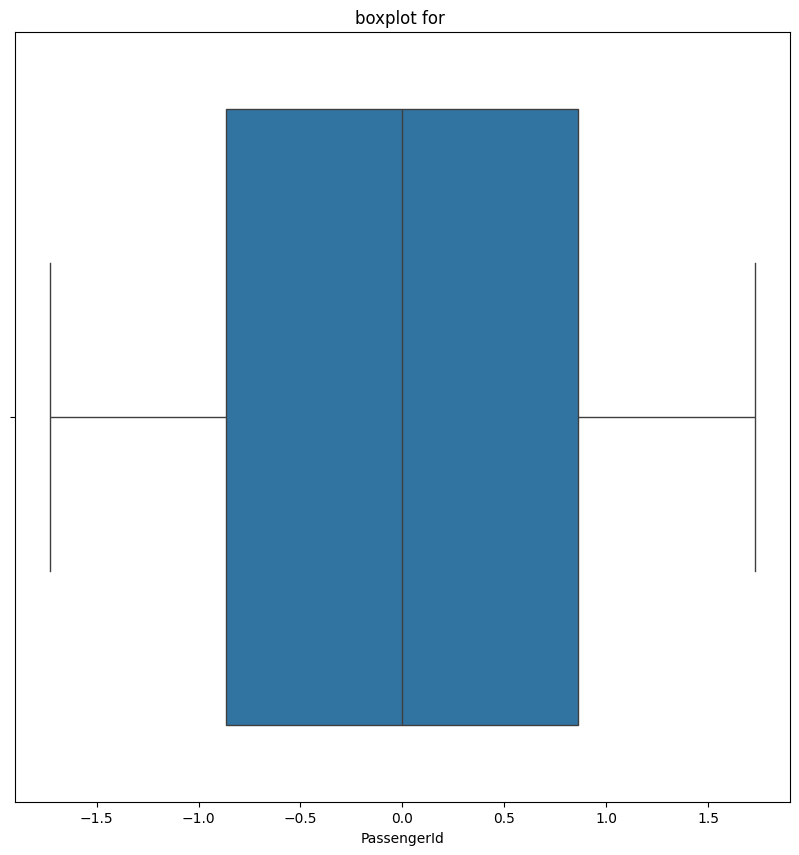

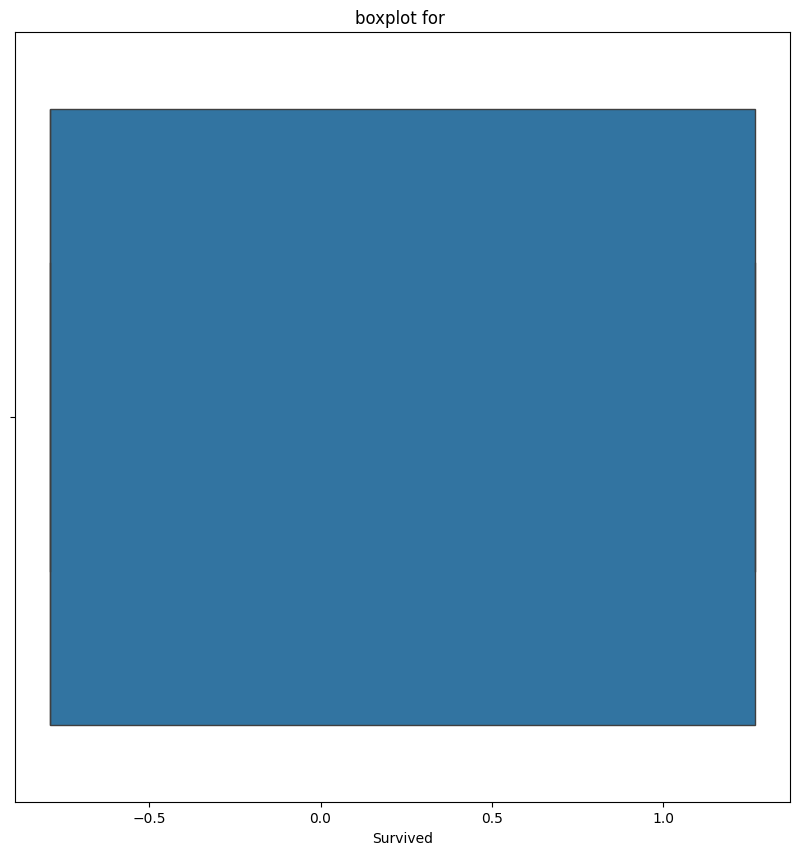

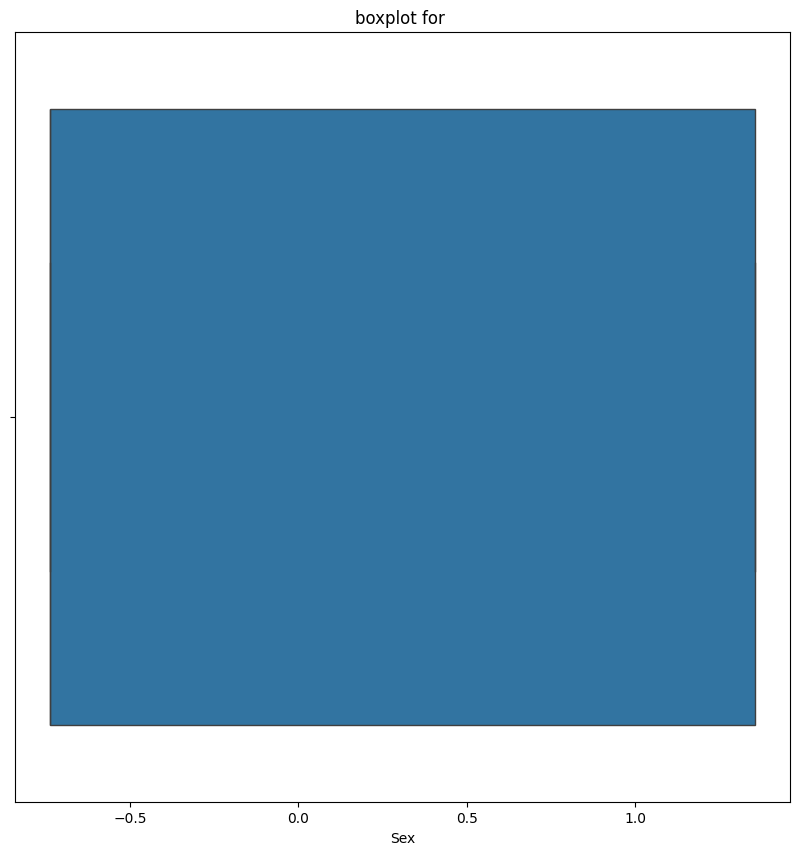

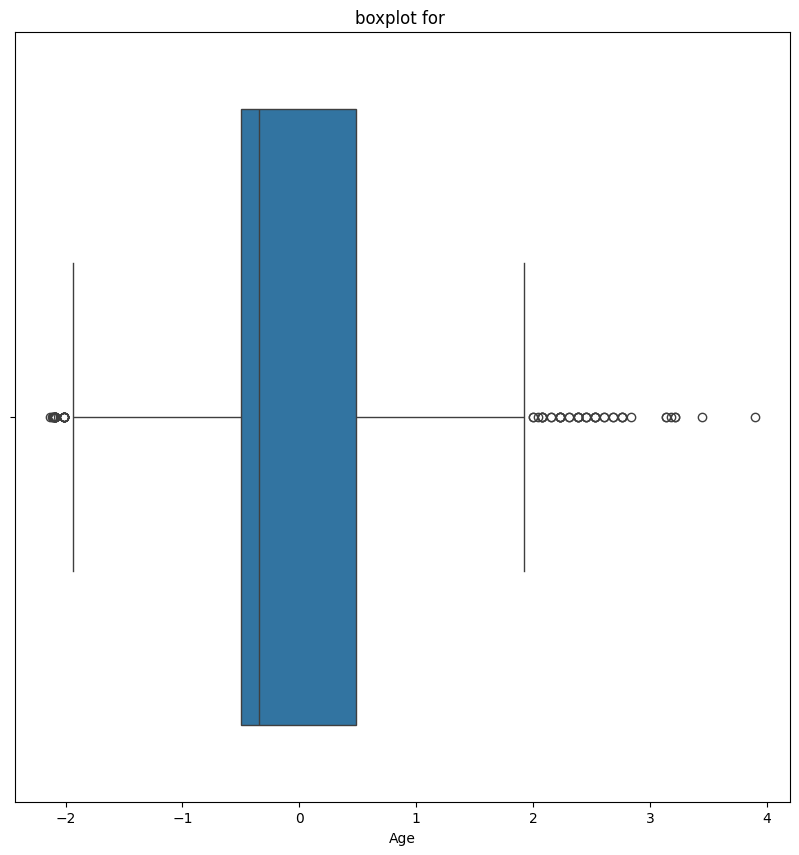

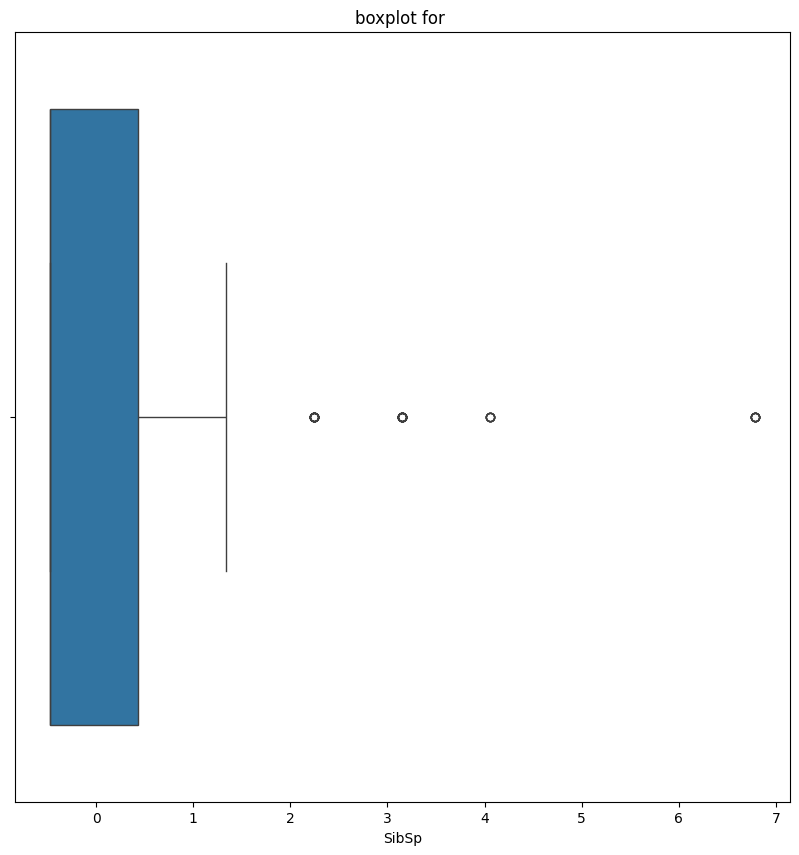

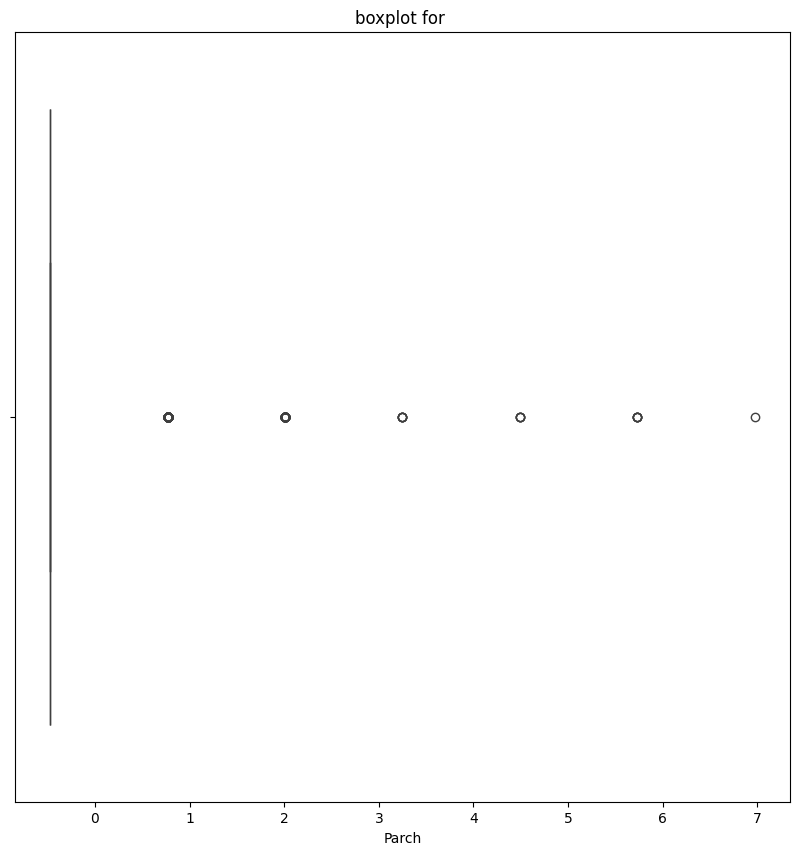

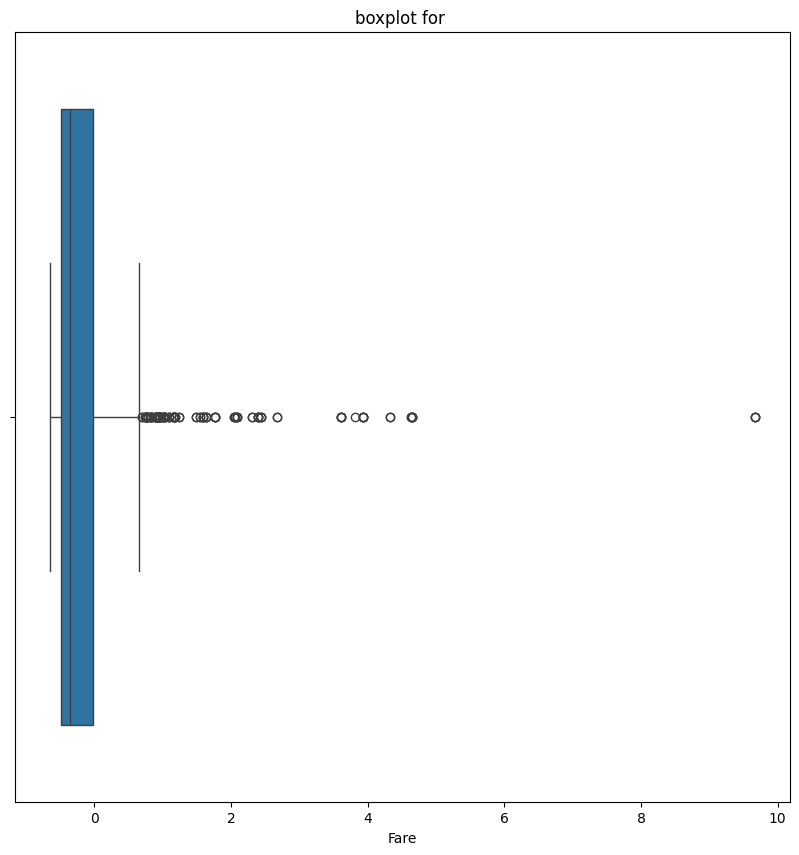

In [64]:
for l in list:
  plt.figure(figsize=(10,10))

  sns.boxplot(x=data[l])
  plt.title("boxplot for ")
  plt.show()

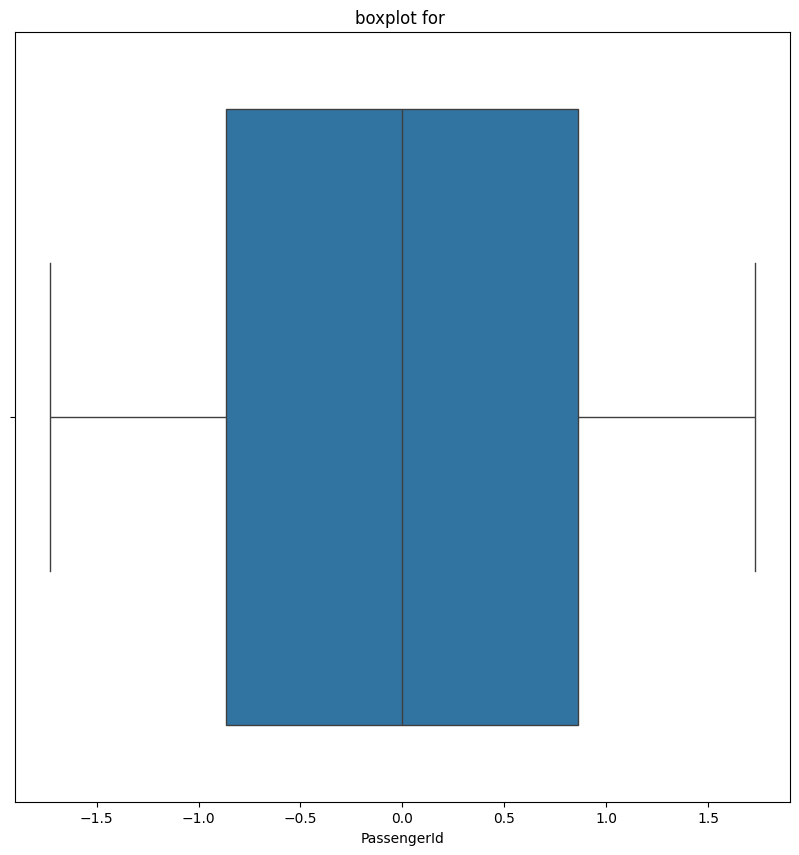

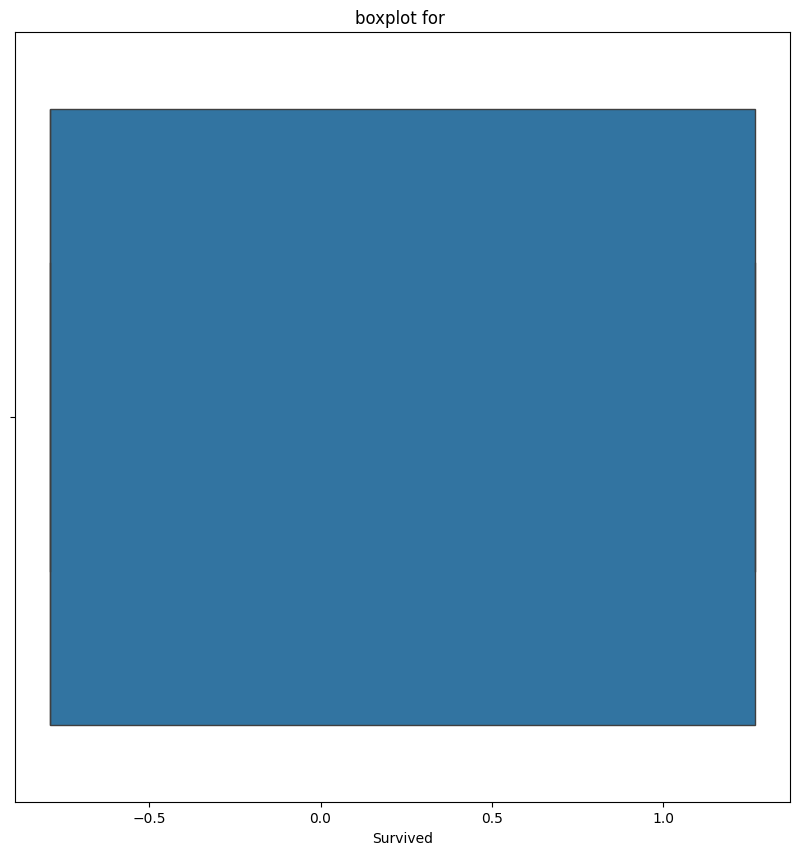

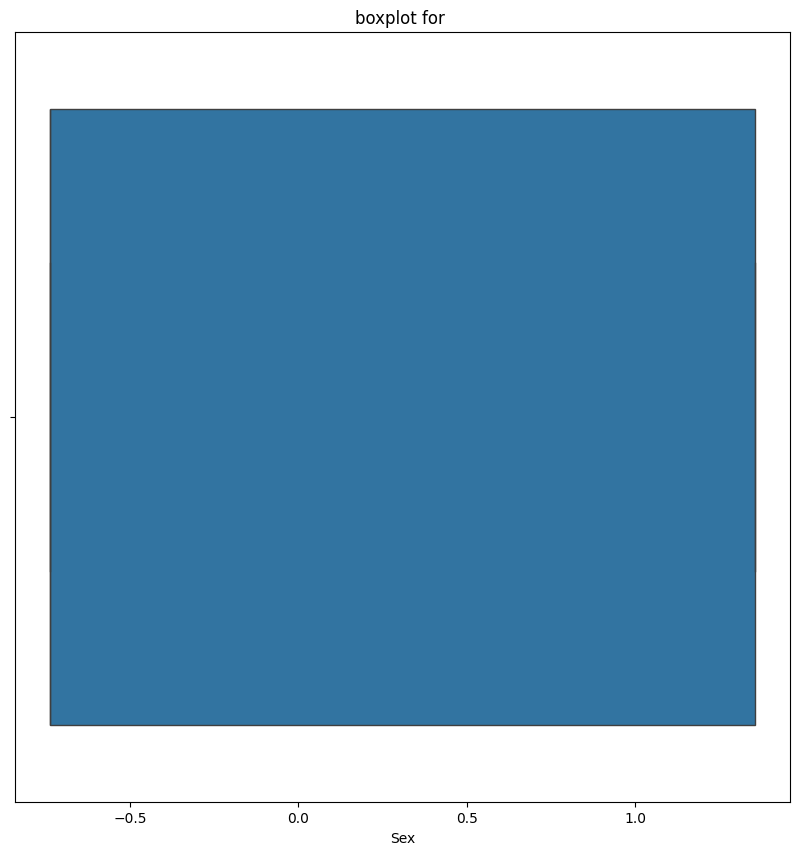

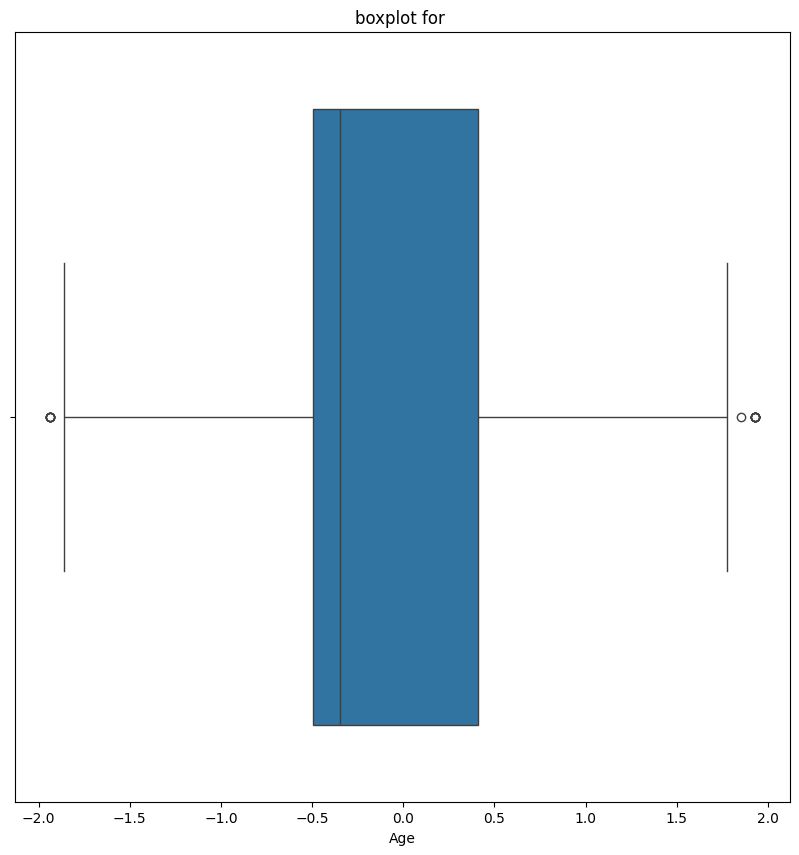

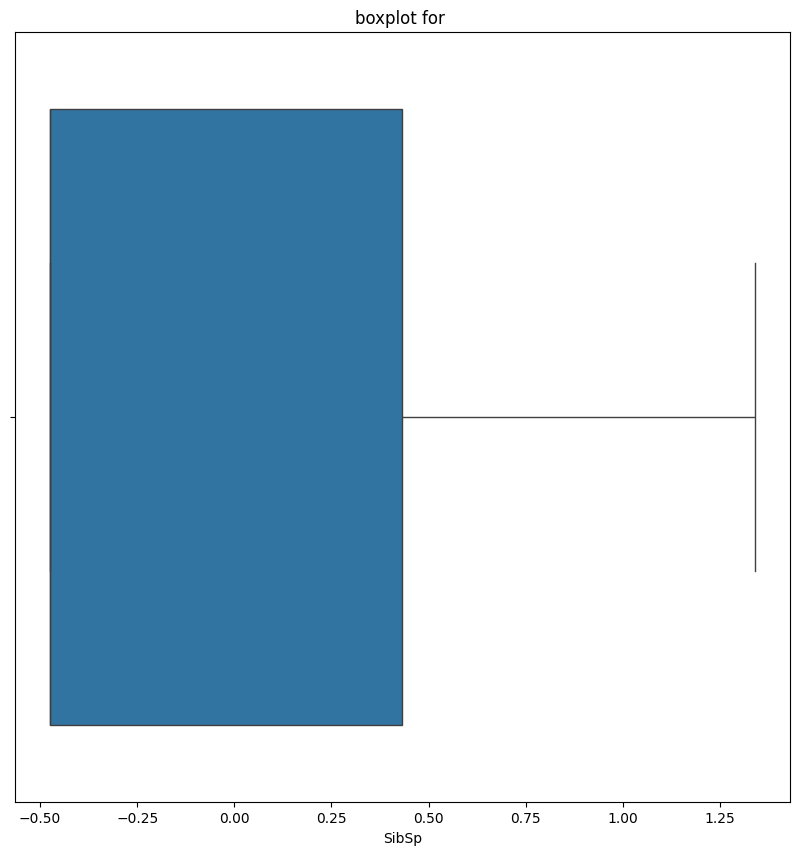

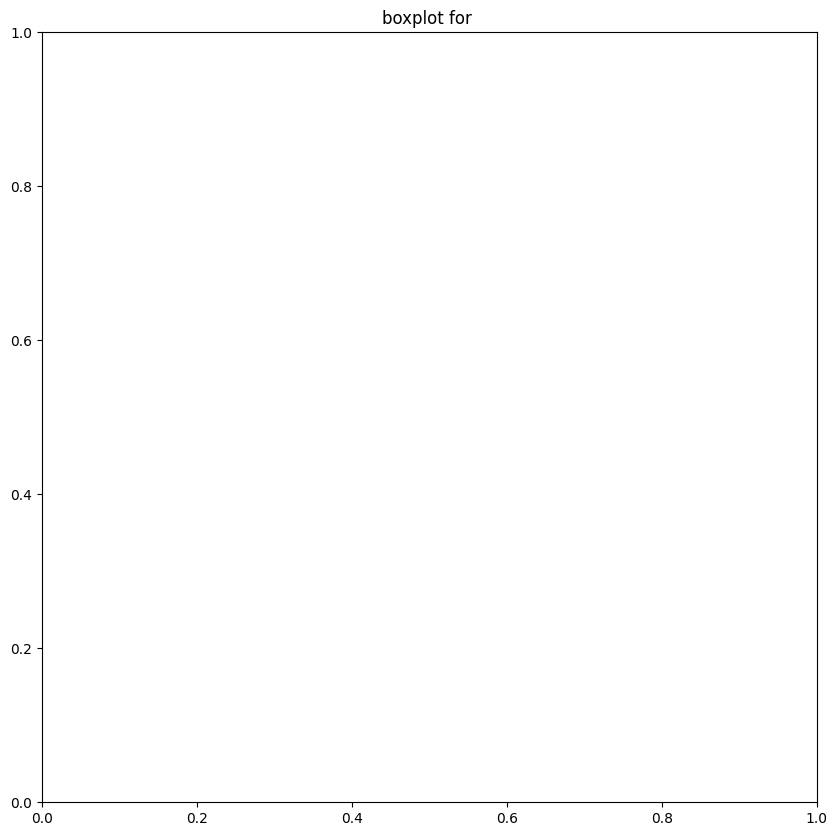

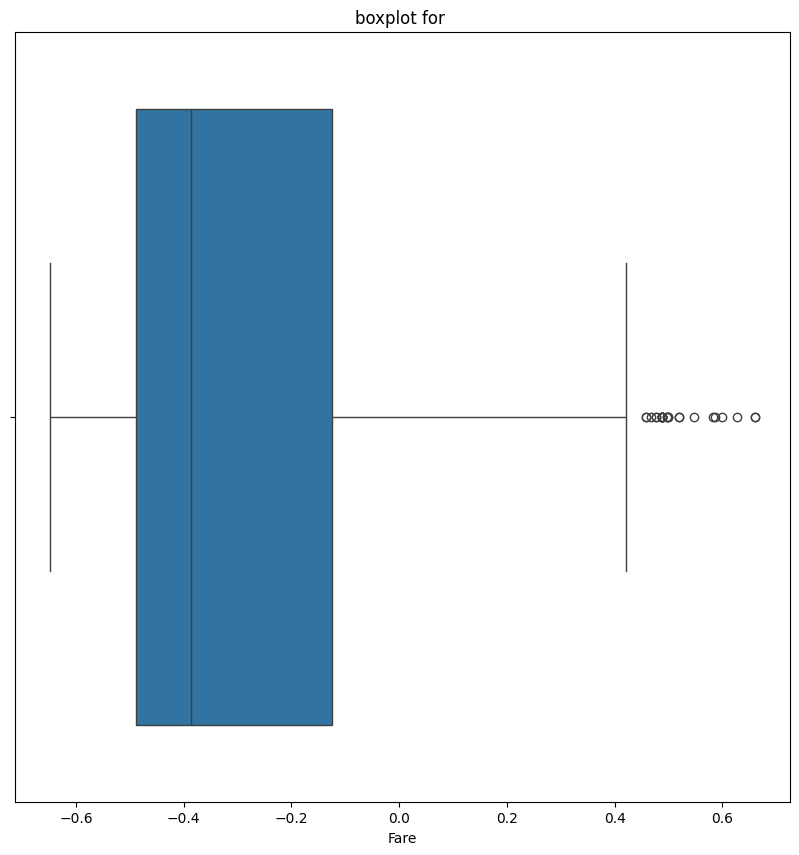

In [65]:
for l in list:

  q1=data[l].quantile(0.25)
  q3=data[l].quantile(0.75)
  i=q3-q1
  lower_b=q1-1.5*i
  upper_b=q3+1.5*i
  newdata=data[(data[l]>=lower_b) & (data[l]<upper_b)]
  plt.figure(figsize=(10,10))
  sns.boxplot(x=newdata[l])
  plt.title("boxplot for ")